#### Sentiment Analysis of Social Media Content in Pashto text

In the present era, people express their opinions on social media in the English language as well as their native languages. So we performed a Sentiment Analysis of the native language 'Pashto'. The Pashto language is the national language of Afghanistan, and it is spoken in many regions of Pakistan. We used online social networks generated corpus translated into English and annotated it into positive, and negative, by two different native and well-aware Pashto speakers.
Here we performed Sentiment Analysis (SA) on Pashto Text using Machine Learning Models including Support Vector Machine (SVM), Naive Bayes (NB), Decision Tree (DT), Random Forest (RF) and AdaBoost with n-gram model of feature extraction technique.

In [1]:
# importing the necessary libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
# load the corpus from my local storage 
os.chdir("C:\\Users\\Toshiba\\Desktop\\New folder\\dsProjects\saDeployment\jupyterNotebook") # set path
pashtoText= pd.read_csv('PashtoCorpusUpdated.csv')

In [3]:
pashtoText.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   600 non-null    int64 
 1   Source               12 non-null     object
 2   Topic                19 non-null     object
 3   PashtoText           600 non-null    object
 4   EnglishtTranslation  600 non-null    object
 5   AnnotatorOne         600 non-null    object
 6   AnnotatorTwo         600 non-null    object
dtypes: int64(1), object(6)
memory usage: 32.9+ KB


In [4]:
pashtoText.head()

,Id,Source,Topic,PashtoText,EnglishtTranslation,AnnotatorOne,AnnotatorTwo
0,1,https://www.facebook.com/167959249906191/posts...,افغان ولسمشر محمد اشرف غني ویلي، په اوسنیو شرا...,د لیوني څخه پوښتنه د یو لیونی څخه یو چا پوښتنه...,Question from a madman Someone asked that grie...,Negative,Negative
1,2,NaN,Afghan President Mohammad Ashraf Ghani said th...,جهالت د نابالغه ماشومانو په باچا پورې خندل نه...,"Ignorance of immature children ,If you don't l...",Positive,Positive
2,3,NaN,NaN,ماته خو بی خوبه خکاری نور نه پو هیږم,I like it but I don't know anymore,Positive,Positive
3,4,NaN,NaN,عنى ځان لپاره عمحوار دى نه د وطن حلکو لپاره دا...,Ghani is a leader for himself and not for the ...,Negative,Negative
4,5,NaN,NaN,خپله سه بلا وهلي یی ړوزي خو نه دي چي کوي یی,what happened with you. This is not joking tha...,Negative,Negative


In [5]:
# dropping unnecessary columns
pashtoText.drop(["Id","Source", "Topic", "PashtoText", "AnnotatorTwo"], axis=1, inplace=True)

In [6]:
pashtoText['EnglishtTranslation'] = pashtoText['EnglishtTranslation'].astype('string')
pashtoText['AnnotatorOne'] = pashtoText['AnnotatorOne'].astype('string')

In [7]:
pashtoText.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EnglishtTranslation  600 non-null    string
 1   AnnotatorOne         600 non-null    string
dtypes: string(2)
memory usage: 9.5 KB


In [8]:
# covert string into numerical of reviewe attr
labels = {"Positive": 1, "Negative": 0}
pashtoText['AnnotatorOne'] = pashtoText['AnnotatorOne'].map(labels)
pashtoText.head()

,EnglishtTranslation,AnnotatorOne
0,Question from a madman Someone asked that grie...,0
1,"Ignorance of immature children ,If you don't l...",1
2,I like it but I don't know anymore,1
3,Ghani is a leader for himself and not for the ...,0
4,what happened with you. This is not joking tha...,0


<AxesSubplot:xlabel='AnnotatorOne', ylabel='count'>

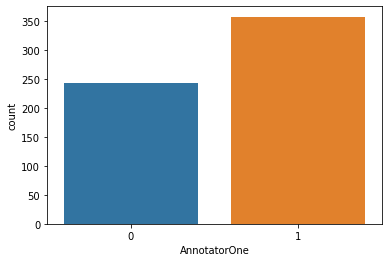

In [9]:
import seaborn as sns 
sns.countplot(pashtoText['AnnotatorOne'])
# pashtoText['AnnotatorOne'].value_counts(normalize=True)*100

In [10]:
from nltk.corpus import stopwords # to remove the stopwrods
from nltk.stem.porter import PorterStemmer # steam to root word every
import re
steamer = PorterStemmer()

In [11]:
from tqdm import tqdm # to show the process bar
cleanedText = []
for i in tqdm(range(0,len(pashtoText))):
    temp = re.sub('[^a-zA-Z]', ' ',pashtoText['EnglishtTranslation'][i]) 
    temp = temp.lower() 
    temp = temp.split() 
    temp = [steamer.stem(word) for word in temp if not word in stopwords.words('english')] 
    temp = ' '.join(temp) 
    cleanedText.append(temp)

100%|██████████| 600/600 [00:03<00:00, 180.82it/s]


In [ ]:
# PashtoText['EnglishtTranslation'] = cleanedText
# pd.DataFrame(PashtoText.head())
# pd.DataFrame(cleanedText)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer # import the feature extraction model n-gram
ngramVC = CountVectorizer(ngram_range=(1, 2))
ngramX = ngramVC.fit_transform(cleanedText).toarray()

In [13]:
print(ngramX.shape)

(600, 3440)


In [14]:
from sklearn.model_selection import train_test_split # to split the data
targetVar = pashtoText['AnnotatorOne']
fTrainX, fTestX, tTrainY, tTestY = train_test_split(ngramX, targetVar, test_size= 0.2, random_state=60)
print("Feature Train X shape:", fTrainX.shape)
print("Feature Test X shape :", fTestX.shape)
print("Targete Train Y shape:", tTrainY.shape)
print("Feature test Y shape :", tTestY.shape)

Feature Train X shape: (480, 3440)
Feature Test X shape : (120, 3440)
Targete Train Y shape: (480,)
Feature test Y shape : (120,)


## SVM Model

In [15]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [18]:
svmModel = svm.SVC(kernel='linear', probability=True).fit(fTrainX, tTrainY)

In [19]:
svmPrediction = svmModel.predict(fTestX)

In [20]:
print(f"Accuracy of SVM Model:{ accuracy_score(tTestY, svmPrediction):.2f}")
print(classification_report(tTestY, svmPrediction))

Accuracy of SVM Model:0.78
              precision    recall  f1-score   support

           0       0.71      0.60      0.65        40
           1       0.81      0.88      0.84        80

    accuracy                           0.78       120
   macro avg       0.76      0.74      0.75       120
weighted avg       0.78      0.78      0.78       120



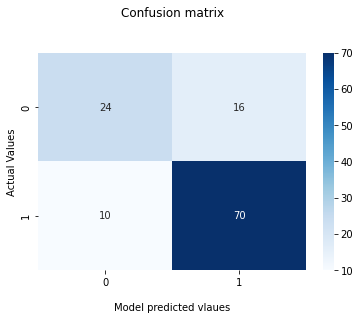

In [21]:
# ploting the confusion matrix
confusionMatrix = pd.crosstab(tTestY, svmPrediction)
conf = sns.heatmap(confusionMatrix, annot=True, cmap='Blues', fmt='d')
conf.set_title('Confusion matrix\n\n');
conf.set_xlabel('\nModel predicted vlaues')
conf.set_ylabel('Actual Values')
plt.show()

Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
nbModel = MultinomialNB().fit(fTrainX, tTrainY)

In [23]:
nbPrediction = nbModel.predict(fTestX)

In [24]:
print(f"Accuracy score of NB model: { accuracy_score(tTestY, nbPrediction): .2f}")
print(classification_report(tTestY, nbPrediction))

Accuracy score of NB model:  0.82
              precision    recall  f1-score   support

           0       0.72      0.72      0.73        40
           1       0.86      0.86      0.86        80

    accuracy                           0.82       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.82      0.82      0.82       120



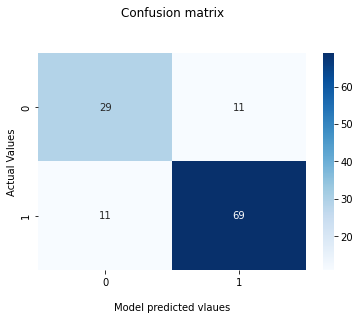

In [25]:
# ploting the confusion matrix
confusionMatrix = pd.crosstab(tTestY, nbPrediction)
conf = sns.heatmap(confusionMatrix, annot=True, cmap='Blues', fmt='d')
conf.set_title('Confusion matrix\n\n');
conf.set_xlabel('\nModel predicted vlaues')
conf.set_ylabel('Actual Values')
plt.show()

In [38]:
# sen = ['ghani is a great leader I lik him']
# res =nbModel.predict(sen)
# print(res)

In [29]:
opinion = 'I like him'
opinion = re.sub('[^a-zA-Z]', ' ', opinion)
opinion = opinion.lower()
opinion = opinion.split()
steamer = PorterStemmer()
stopwordAll = stopwords.words('english')
stopwordAll.remove('not')
opinion = [steamer.stem(word) for word in opinion if not word in set(stopwordAll)]
opinion = ' '.join(opinion)
corpusNew = [opinion]
TestX = ngramVC.transform(corpusNew).toarray()
predYNew = nbModel.predict(TestX)
if predYNew == 1:
  print("Positive review")
elif predYNew == 0:
  print("Negative review")

Positive review


Desion Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtModel = DecisionTreeClassifier(criterion = 'gini')
dtModel = dtModel.fit(fTrainX, tTrainY)

In [31]:
dtPrediction = dtModel.predict(fTestX)

In [32]:
print(f"Accuracy score of DT model: { accuracy_score(tTestY, dtPrediction): .2f}")
print(classification_report(tTestY, dtPrediction))

Accuracy score of DT model:  0.72
              precision    recall  f1-score   support

           0       0.56      0.68      0.61        40
           1       0.82      0.74      0.78        80

    accuracy                           0.72       120
   macro avg       0.69      0.71      0.69       120
weighted avg       0.73      0.72      0.72       120



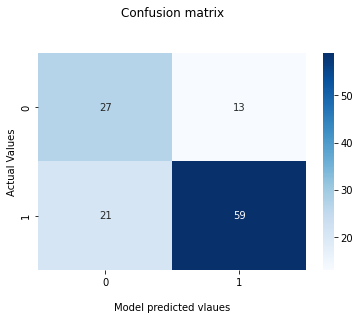

In [33]:
# ploting the confusion matrix
confusionMatrix = pd.crosstab(tTestY, dtPrediction)
conf = sns.heatmap(confusionMatrix, annot=True, cmap='Blues', fmt='d')
conf.set_title('Confusion matrix\n\n');
conf.set_xlabel('\nModel predicted vlaues')
conf.set_ylabel('Actual Values')
plt.show()

Rando Forest Model

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier(random_state=50)
rfModel = rfModel.fit(fTrainX, tTrainY)

In [35]:
rfPrediction = rfModel.predict(fTestX)

In [36]:
print(f"Accuracy score of RF model: { accuracy_score(tTestY, rfPrediction): .2f}")
print(classification_report(tTestY, rfPrediction))

Accuracy score of RF model:  0.78
              precision    recall  f1-score   support

           0       0.78      0.45      0.57        40
           1       0.77      0.94      0.85        80

    accuracy                           0.78       120
   macro avg       0.78      0.69      0.71       120
weighted avg       0.78      0.78      0.76       120



AdaBoost Model

In [37]:
from sklearn.ensemble import AdaBoostClassifier
adaBdefine = AdaBoostClassifier(n_estimators=50, random_state=10)
adaBoostModel = adaBdefine.fit(fTrainX, tTrainY)

In [38]:
adBoostPrediction = adaBoostModel.predict(fTestX)

In [40]:
print(f"Accuracy score of RF model: { accuracy_score(tTestY, adBoostPrediction): .2f}")
print(classification_report(tTestY, adBoostPrediction))

Accuracy score of RF model:  0.75
              precision    recall  f1-score   support

           0       0.68      0.47      0.56        40
           1       0.77      0.89      0.83        80

    accuracy                           0.75       120
   macro avg       0.73      0.68      0.69       120
weighted avg       0.74      0.75      0.74       120



Probablities Prediction

In [41]:
probs = [0 for _ in range(len(tTestY))]
svmProb = svmModel.predict_proba(fTestX)
nbProb = nbModel.predict_proba(fTestX)
dtProb = dtModel.predict_proba(fTestX)
rfProb = rfModel.predict_proba(fTestX)
adaBoostProb = adaBoostModel.predict_proba(fTestX)

Probablities of positive outcome

In [42]:
svmProb = svmProb[:, 1]
nbProb = nbProb[:, 1]
dtProb = dtProb[:, 1]
rfProb = rfProb[:, 1]
adaBoostProb = adaBoostProb[:, 1]

AUROC values

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
aurRand = roc_auc_score(tTestY, probs)
svmAUC = roc_auc_score(tTestY, svmProb)
nbAUC = roc_auc_score(tTestY, nbProb)
dtAUC = roc_auc_score(tTestY, dtProb)
rfAUC = roc_auc_score(tTestY, rfProb)
adaBoostAUC = roc_auc_score(tTestY, adaBoostProb)

Display the AUCROC Score 

In [45]:
print("Random prediction AUROC ____ = %.3f" %(aurRand))
print("SVM score of AUROC ________  = %.3f" %(svmAUC))
print("Naive Bayes score of AUROC _ = %.3f" %(nbAUC))
print("Decion Tree score of AUROC _ = %.3f" %(dtAUC))
print("Random Forest score of AUROC = %.3f" %(rfAUC))
print("AdaBoost Score of AUROC ____ = %.3f" %(adaBoostAUC))

Random prediction AUROC ____ = 0.500
SVM score of AUROC ________  = 0.870
Naive Bayes score of AUROC _ = 0.862
Decion Tree score of AUROC _ = 0.706
Random Forest score of AUROC = 0.878
AdaBoost Score of AUROC ____ = 0.792


Computing the ROC curve

In [46]:
RandFPR, randTPR, _ = roc_curve(tTestY, probs)
svmFPR, svmTPR, _ = roc_curve(tTestY, svmProb)
nbFPR, nbTPR, _ = roc_curve(tTestY, nbProb)
dtFPR, dtTPR, _ = roc_curve(tTestY, dtProb)
rfFPR, rfTPR, _ = roc_curve(tTestY, rfProb)
adaBoostFPR, adaBoostTPR, _ = roc_curve(tTestY, adaBoostProb)

Ploting the ROC: comparision of all models

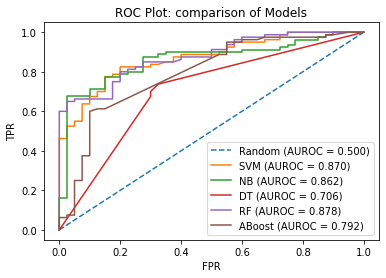

In [47]:
plt.Figure(figsize=(16, 12))
plt.plot(RandFPR, randTPR,  linestyle = '--', label= 'Random (AUROC = %.3f)' % aurRand )
plt.plot(svmFPR, svmTPR,  linestyle = 'solid', label= 'SVM (AUROC = %.3f)' % svmAUC )
plt.plot(nbFPR, nbTPR,  linestyle = 'solid', label= 'NB (AUROC = %.3f)' % nbAUC )
plt.plot(dtFPR, dtTPR,  linestyle = 'solid', label= 'DT (AUROC = %.3f)' % dtAUC )
plt.plot(rfFPR, rfTPR,  linestyle = 'solid', label= 'RF (AUROC = %.3f)' % rfAUC )
plt.plot(adaBoostFPR, adaBoostTPR,  linestyle = 'solid', label= 'ABoost (AUROC = %.3f)' % adaBoostAUC )

plt.title('ROC Plot: comparison of Models')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()


In [48]:
from joblib import dump
fileName = "nbModelPred.joblib"
dump(nbModel, fileName)

['nbModelPred.joblib']

In [49]:
vectorName = "vect.joblib"
dump(ngramVC, vectorName)

['vect.joblib']